In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm
import pylab
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

from sklearn.model_selection import cross_val_score, StratifiedKFold
import warnings
warnings.filterwarnings('ignore')

In [246]:
dt=pd.read_csv(r'../input/heart-attack-analysis-prediction-dataset/heart.csv')
dt

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [247]:
dt.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


<AxesSubplot:>

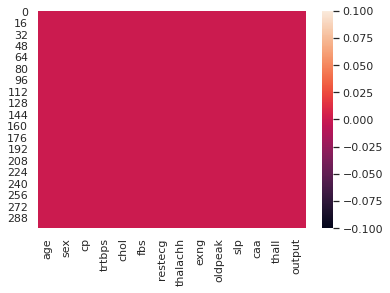

In [248]:
sns.heatmap(dt.isnull())

In [249]:
Cate=['sex','cp','fbs','restecg','exng','slp','caa','thall','output']
Num=['age','trtbps','chol','thalachh','oldpeak']

# **EDA**

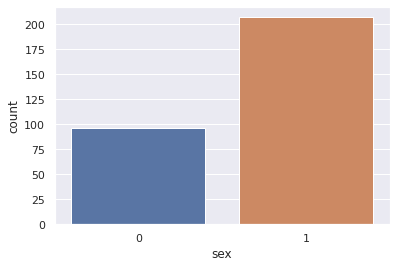

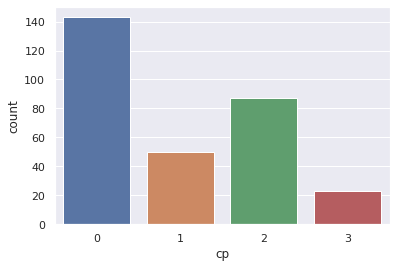

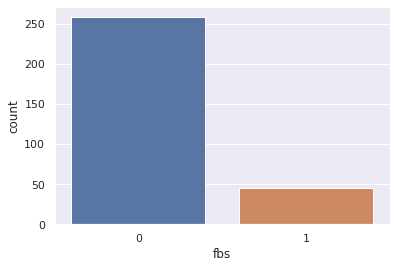

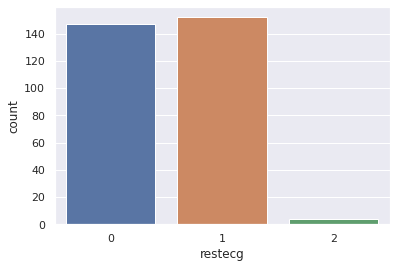

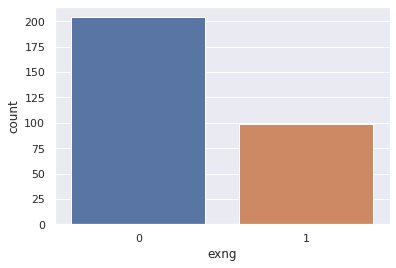

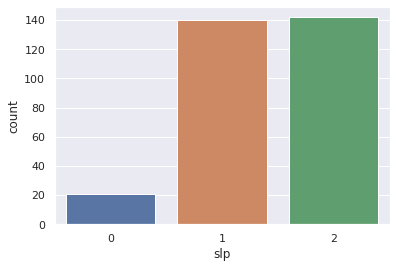

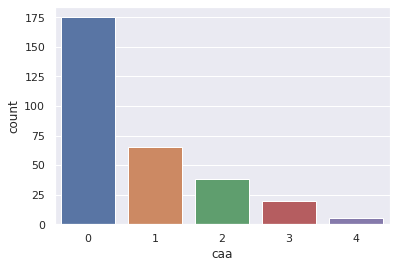

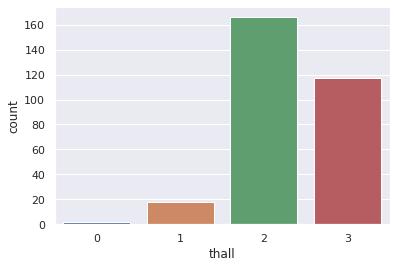

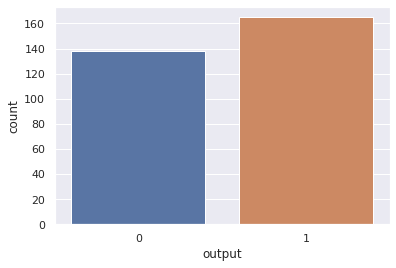

In [250]:
for i in Cate:
    sns.countplot(dt[i])
    plt.show()

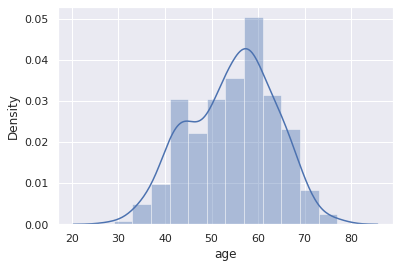

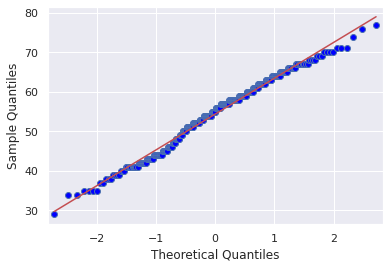

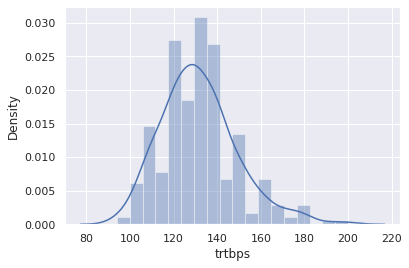

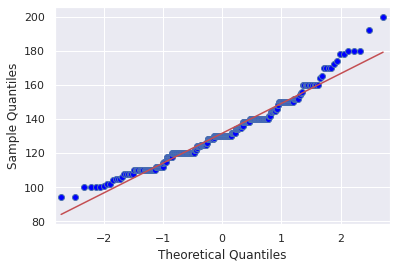

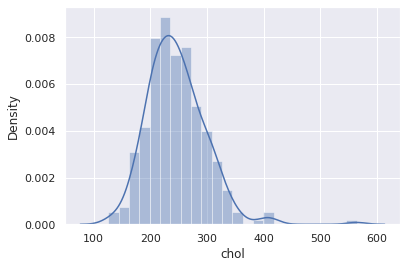

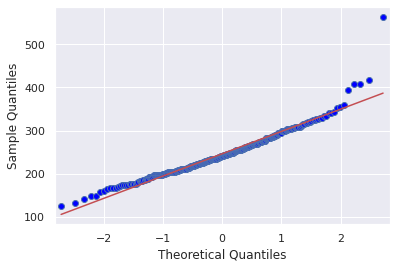

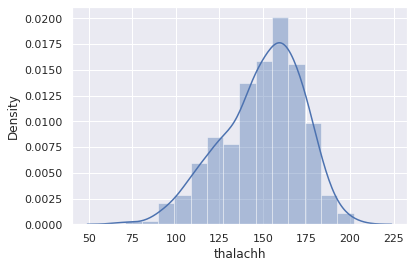

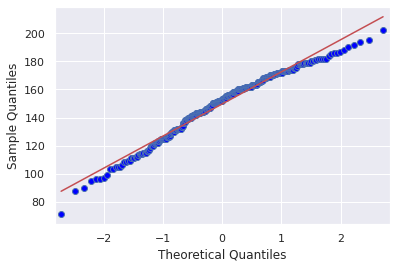

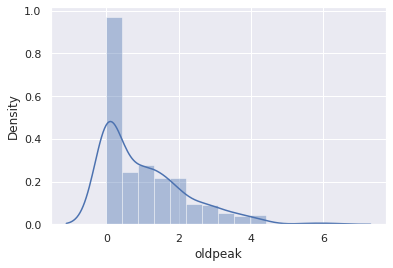

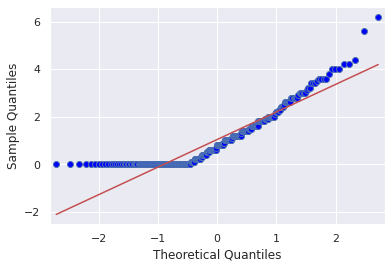

In [251]:
for i in Num:  
    sns.distplot(dt[i])
    sm.qqplot(dt[i],line="s")
    pylab.show()

age            AxesSubplot(0.125,0.749828;0.133621x0.130172)
sex         AxesSubplot(0.285345,0.749828;0.133621x0.130172)
cp           AxesSubplot(0.44569,0.749828;0.133621x0.130172)
trtbps      AxesSubplot(0.606034,0.749828;0.133621x0.130172)
chol        AxesSubplot(0.766379,0.749828;0.133621x0.130172)
fbs            AxesSubplot(0.125,0.593621;0.133621x0.130172)
restecg     AxesSubplot(0.285345,0.593621;0.133621x0.130172)
thalachh     AxesSubplot(0.44569,0.593621;0.133621x0.130172)
exng        AxesSubplot(0.606034,0.593621;0.133621x0.130172)
oldpeak     AxesSubplot(0.766379,0.593621;0.133621x0.130172)
slp            AxesSubplot(0.125,0.437414;0.133621x0.130172)
caa         AxesSubplot(0.285345,0.437414;0.133621x0.130172)
thall        AxesSubplot(0.44569,0.437414;0.133621x0.130172)
output      AxesSubplot(0.606034,0.437414;0.133621x0.130172)
dtype: object

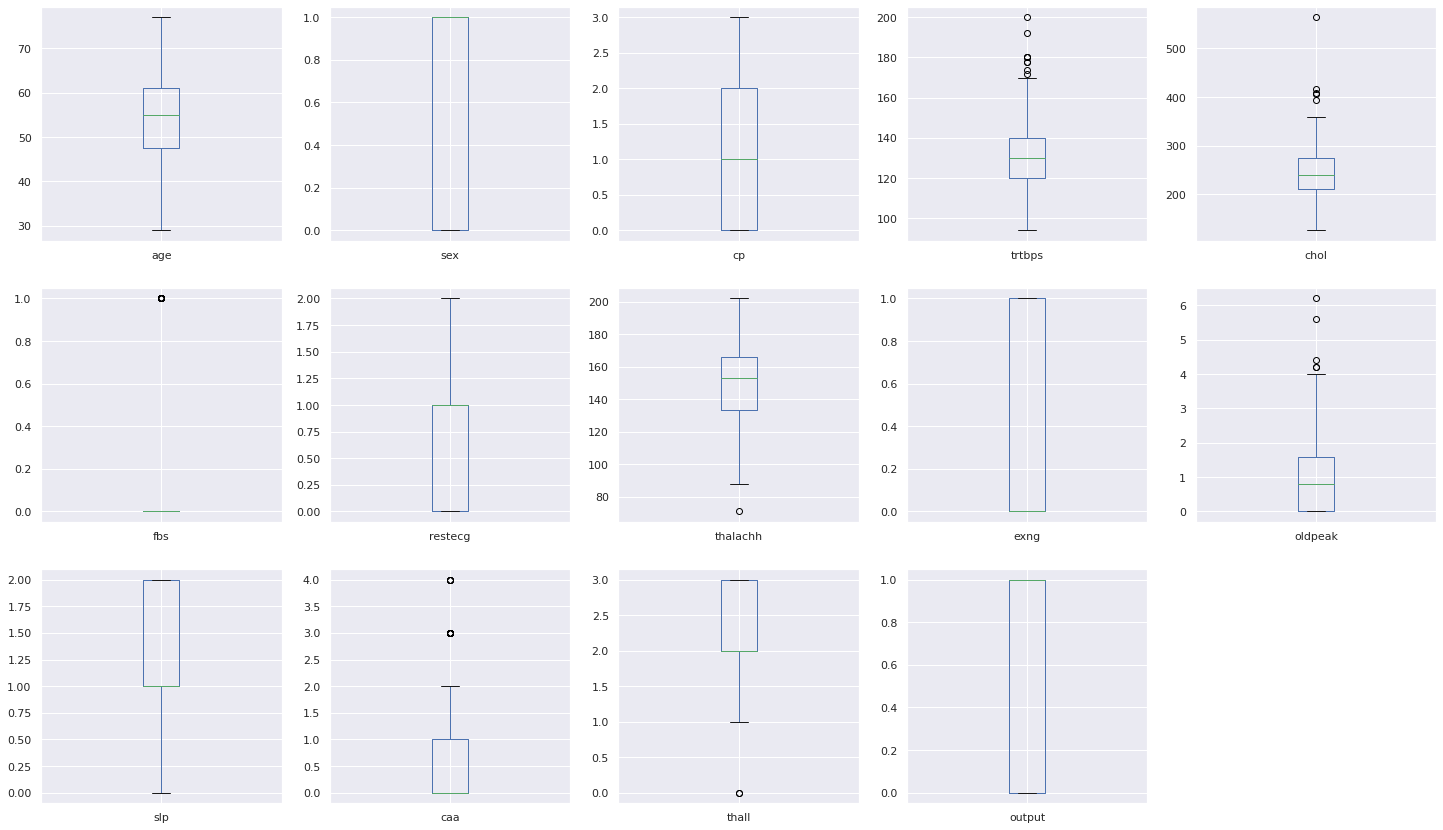

In [252]:
dt.plot(kind='box',subplots=True,layout=(5,5),figsize=(25,25))

In [253]:
dt.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [254]:
### filling each outlier value with mean of that particular variable
dt.loc[dt['trtbps']>170,'trtbps']=np.mean(dt['trtbps'])
dt.loc[dt['chol']>370,'chol']=np.mean(dt['chol'])
dt.loc[dt['thalachh']<71,'thalachh']=np.mean(dt['thalachh'])
dt.loc[dt['oldpeak']>4,'oldpeak']=np.mean(dt['oldpeak'])

age            AxesSubplot(0.125,0.749828;0.133621x0.130172)
sex         AxesSubplot(0.285345,0.749828;0.133621x0.130172)
cp           AxesSubplot(0.44569,0.749828;0.133621x0.130172)
trtbps      AxesSubplot(0.606034,0.749828;0.133621x0.130172)
chol        AxesSubplot(0.766379,0.749828;0.133621x0.130172)
fbs            AxesSubplot(0.125,0.593621;0.133621x0.130172)
restecg     AxesSubplot(0.285345,0.593621;0.133621x0.130172)
thalachh     AxesSubplot(0.44569,0.593621;0.133621x0.130172)
exng        AxesSubplot(0.606034,0.593621;0.133621x0.130172)
oldpeak     AxesSubplot(0.766379,0.593621;0.133621x0.130172)
slp            AxesSubplot(0.125,0.437414;0.133621x0.130172)
caa         AxesSubplot(0.285345,0.437414;0.133621x0.130172)
thall        AxesSubplot(0.44569,0.437414;0.133621x0.130172)
output      AxesSubplot(0.606034,0.437414;0.133621x0.130172)
dtype: object

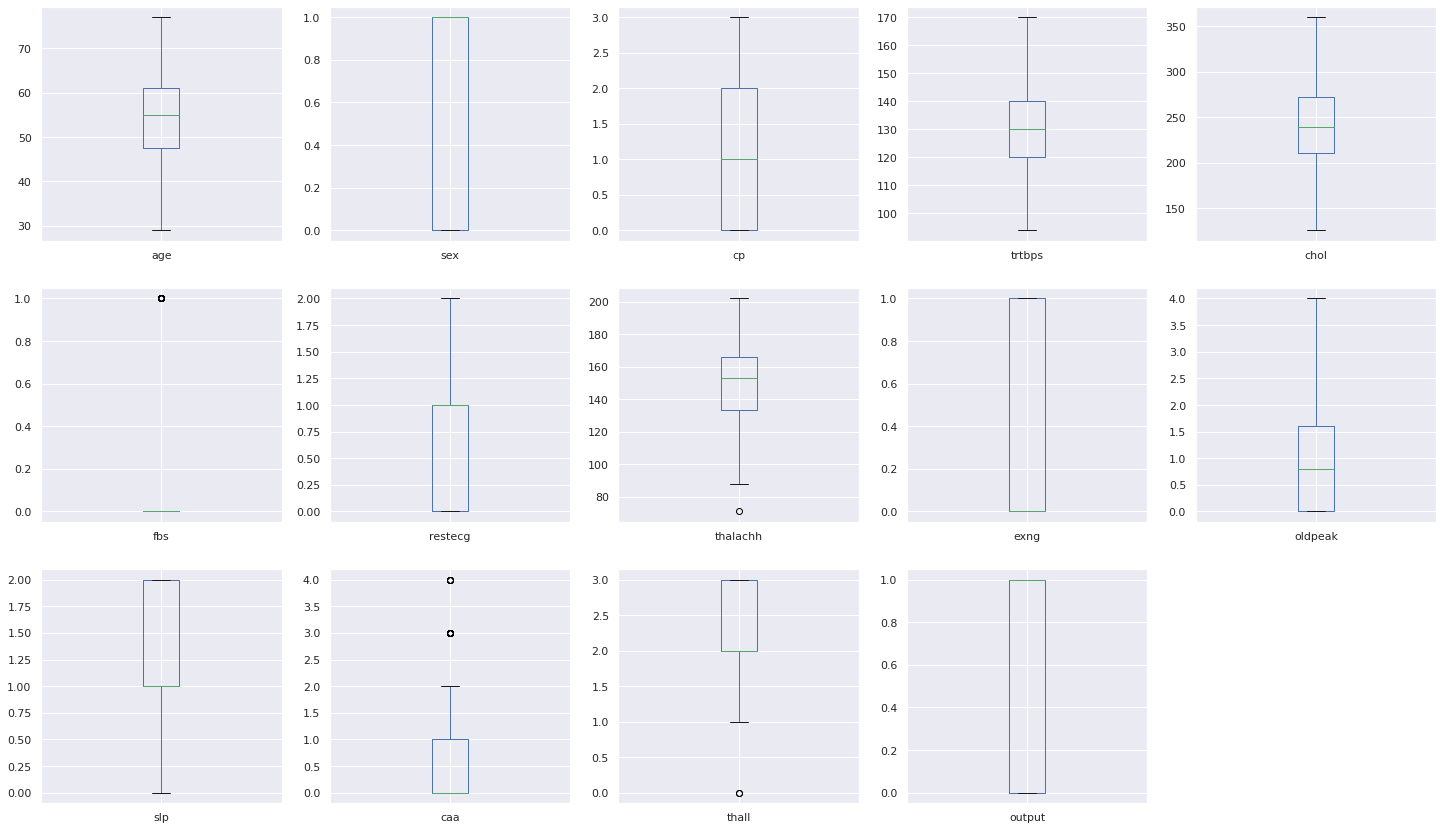

In [255]:
dt.plot(kind='box',subplots=True,layout=(5,5),figsize=(25,25))

# Dividing the data 

In [256]:
x_=dt.drop(columns=['output'])
y=dt[['output']]

In [257]:
# we have balanced data
y.value_counts()

output
1         165
0         138
dtype: int64

In [258]:
x1=x_[['age','cp','trtbps','restecg','chol','thalachh','oldpeak','slp','caa','thall']]
x2=x_[['sex','fbs','exng']]

# Standardization

In [259]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_sc=sc.fit_transform(x1)

In [260]:
x11=pd.DataFrame(x_sc)
x11.columns=['age','cp','trtbps','restecg','chol','thalachh','oldpeak','slp','caa','thall']
x=pd.concat([x2,x11],axis=1)
x

,sex,fbs,exng,age,cp,trtbps,restecg,chol,thalachh,oldpeak,slp,caa,thall
0,1,1,0,0.952197,1.973123,0.983575,-1.005832,-0.226142,0.015443,1.274536,-2.274579,-0.714429,-2.148873
1,1,0,0,-1.915313,1.002577,-0.009309,0.898962,0.154615,1.633471,2.429330,-2.274579,-0.714429,-0.512922
2,0,0,0,-1.474158,0.032031,-0.009309,-1.005832,-0.875670,0.977514,0.408440,0.976352,-0.714429,-0.512922
3,1,0,0,0.180175,0.032031,-0.671232,0.898962,-0.158950,1.239897,-0.168957,0.976352,-0.714429,-0.512922
4,0,0,1,0.290464,-0.938515,-0.671232,0.898962,2.483955,0.583939,-0.361423,0.976352,-0.714429,-0.512922
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0,0,1,0.290464,-0.938515,0.652613,0.898962,-0.046962,-1.165281,-0.746354,-0.649113,-0.714429,1.123029
299,1,0,0,-1.033002,1.973123,-1.333154,0.898962,0.468180,-0.771706,0.215974,-0.649113,-0.714429,1.123029
300,1,1,0,1.503641,-0.938515,0.917382,0.898962,-1.122042,-0.378132,2.333097,-0.649113,1.244593,1.123029
301,1,0,1,0.290464,-0.938515,-0.009309,0.898962,-2.510687,-1.515125,0.215974,-0.649113,0.265082,1.123029


# Model Building

## 1. Logistic Regression

In [261]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold

lr=LogisticRegression()

skfold = StratifiedKFold(n_splits=10)
n_scores = cross_val_score(lr, x, y, scoring='accuracy', cv=skfold, n_jobs=-1, error_score='raise')
# report performance
print(n_scores)
print('Accuracy  of Random Forest is',np.mean(n_scores))

[0.90322581 0.80645161 0.87096774 0.9        0.9        0.76666667
 0.83333333 0.86666667 0.7        0.8       ]
Accuracy  of Random Forest is 0.8347311827956989


## 2. K nearest neighbor

In [262]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=1)

skfold = StratifiedKFold(n_splits=10)
n_scores = cross_val_score(knn, x, y, scoring='accuracy', cv=skfold, n_jobs=-1, error_score='raise')
# report performance
print(n_scores)
print('Accuracy of KNN is',np.mean(n_scores))

[0.87096774 0.74193548 0.74193548 0.83333333 0.8        0.76666667
 0.76666667 0.66666667 0.73333333 0.7       ]
Accuracy of KNN is 0.7621505376344085


## **Choosing k value**

Lets go ahead and use elbow method to pick a good k value

In [263]:
from sklearn.model_selection import cross_val_score
accuracy_rate=[]

for i in range(1,13):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,x,y,cv=10)
    accuracy_rate.append(score.mean())

In [264]:
error_rate=[]
for i in range(1,13):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,x,y,cv=10)
    error_rate.append(1-score.mean())

Text(0, 0.5, 'error rate')

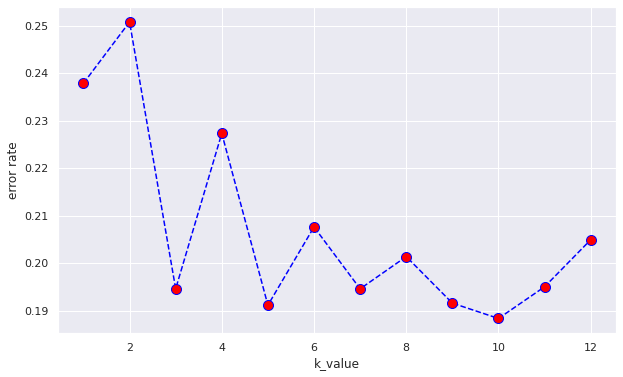

In [265]:
plt.figure(figsize=(10,6))
plt.plot(range(1,13),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.xlabel('k_value')
plt.ylabel('error rate')

Text(0, 0.5, 'accuracy rate')

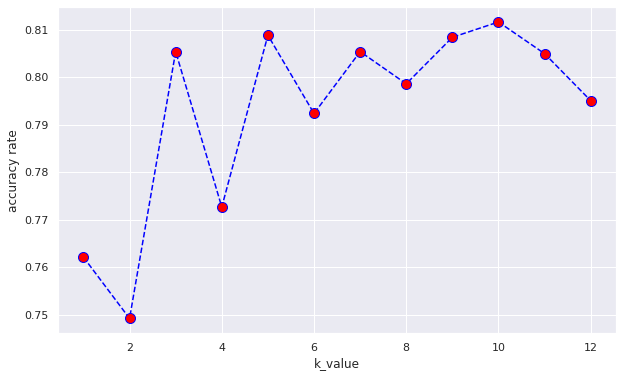

In [266]:
plt.figure(figsize=(10,6))
plt.plot(range(1,13),accuracy_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.xlabel('k_value')
plt.ylabel('accuracy rate')

By selecting k value 10 we are getting maximum accuracy

In [267]:
from sklearn.neighbors import KNeighborsClassifier

knn_=KNeighborsClassifier(n_neighbors=10)
skfold = StratifiedKFold(n_splits=10)
n_scores = cross_val_score(knn_, x, y, scoring='accuracy', cv=skfold, n_jobs=-1, error_score='raise')
# report performance
print(n_scores)
print('Accuracy of KNN is',np.mean(n_scores))

[0.90322581 0.77419355 0.83870968 0.93333333 0.8        0.66666667
 0.86666667 0.86666667 0.73333333 0.73333333]
Accuracy of KNN is 0.8116129032258064


## 3. SVC

In [268]:
from sklearn.svm import SVC

svc=SVC(kernel='rbf')
skfold = StratifiedKFold(n_splits=10)
n_scores = cross_val_score(svc, x, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print(n_scores)
print('Accuracy  of SVC is',np.mean(n_scores))

[0.83870968 0.83870968 0.74193548 0.86666667 0.9        0.83333333
 0.83333333 0.76666667 0.83333333 0.83333333 0.80645161 0.83870968
 0.77419355 0.9        1.         0.8        0.73333333 0.86666667
 0.66666667 0.86666667 0.83870968 0.93548387 0.67741935 0.93333333
 0.8        0.9        0.76666667 0.9        0.83333333 0.83333333]
Accuracy  of SVC is 0.8318996415770606


## 4. Random Forest

In [269]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(criterion='gini',)
skfold = StratifiedKFold(n_splits=10)
n_scores = cross_val_score(rfc, x, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print(n_scores)
print('Accuracy  of Random Forest is',np.mean(n_scores))

[0.90322581 0.77419355 0.80645161 0.8        0.96666667 0.83333333
 0.8        0.73333333 0.8        0.83333333 0.83870968 0.83870968
 0.74193548 0.9        0.93333333 0.8        0.83333333 0.9
 0.76666667 0.83333333 0.80645161 0.90322581 0.64516129 0.8
 0.73333333 0.9        0.7        0.9        0.83333333 0.8       ]
Accuracy  of Random Forest is 0.8219354838709676


# 5. AdaBoost Classifier

In [270]:
from sklearn.ensemble import AdaBoostClassifier

ada=AdaBoostClassifier()

skfold = StratifiedKFold(n_splits=10)
n_scores = cross_val_score(ada, x, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print(n_scores)
print('Accuracy  of AdaBoost Classifier is',np.mean(n_scores))

[0.80645161 0.83870968 0.80645161 0.8        0.73333333 0.9
 0.93333333 0.7        0.73333333 0.76666667 0.74193548 0.77419355
 0.74193548 0.93333333 0.9        0.8        0.76666667 0.8
 0.8        0.86666667 0.77419355 0.83870968 0.64516129 0.93333333
 0.73333333 0.9        0.8        0.76666667 0.8        0.83333333]
Accuracy  of AdaBoost Classifier is 0.8055913978494623


# 6. Gradient Boosting Classifier

In [271]:
from sklearn.ensemble import GradientBoostingClassifier

grad=GradientBoostingClassifier()
skfold = StratifiedKFold(n_splits=10)
n_scores = cross_val_score(svc, x, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print(n_scores)
print('Accuracy  of Gradient Boosting Classifier is',np.mean(n_scores))

[0.83870968 0.83870968 0.74193548 0.86666667 0.9        0.83333333
 0.83333333 0.76666667 0.83333333 0.83333333 0.80645161 0.83870968
 0.77419355 0.9        1.         0.8        0.73333333 0.86666667
 0.66666667 0.86666667 0.83870968 0.93548387 0.67741935 0.93333333
 0.8        0.9        0.76666667 0.9        0.83333333 0.83333333]
Accuracy  of Gradient Boosting Classifier is 0.8318996415770606


# Logistic regression  gives maximum accuracy